In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('covid_19_india.csv')
state = pd.read_csv('StatewiseTestingDetails.csv')
vaccine=pd.read_csv('covid_vaccine_statewise.csv')

In [4]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818
16849,16850,2021-07-07,8:00 AM,West Bengal,-,-,1472132,17834,1507241


In [6]:
df.shape

(16850, 9)

In [7]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [9]:
##Drop the less important columns
df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace=True,axis=1)

In [10]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [11]:
## Change the datatype of 'Date'
df['Date']= pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16850 non-null  datetime64[ns]
 1   State/UnionTerritory  16850 non-null  object        
 2   Cured                 16850 non-null  int64         
 3   Deaths                16850 non-null  int64         
 4   Confirmed             16850 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 658.3+ KB


In [13]:
## Active cases
df['Active_cases']= df['Confirmed']-(df['Cured']+df['Deaths'])

In [14]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [17]:
## Statewise analysis

statewise=pd.pivot_table(df, values=["Confirmed", "Active_cases", "Deaths", "Cured"], index="State/UnionTerritory", aggfunc=max)

In [21]:
statewise['Recovery Rate']=statewise['Cured']*100/statewise['Confirmed']
statewise['Mortality Rate']=statewise['Deaths']*100/statewise['Confirmed']
statewise = statewise.sort_values(by="Recovery Rate", ascending=False)
statewise.style.background_gradient(cmap="YlOrRd")

,Active_cases,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,,
Dadra and Nagar Haveli and Daman and Diu,2081,10575,10532,4,99.593381,0.037825
Rajasthan,212753,952836,942882,8942,98.955329,0.938462
Dadra and Nagar Haveli,250,10377,10261,4,98.882143,0.038547
Madhya Pradesh,111366,790042,780578,9017,98.802089,1.141332
Haryana,116867,769030,758442,9506,98.623201,1.236103
Uttar Pradesh,310783,1706818,1682130,22656,98.553566,1.327382
Chandigarh,8653,61752,60837,809,98.518267,1.310079
Gujarat,148297,823964,811699,10072,98.511464,1.222384
Bihar,115152,722746,711913,9612,98.501133,1.329928


In [24]:
## Print the top 10 active cases

top_10_active_states = df.groupby(by='State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by="Active_cases", ascending=False).reset_index()

In [26]:
top_10_active_states[:10]

,State/UnionTerritory,Active_cases,Date
0,Maharashtra,701614,2021-07-07
1,Karnataka,605515,2021-07-07
2,Kerala,445692,2021-07-07
3,Tamil Nadu,313048,2021-07-07
4,Uttar Pradesh,310783,2021-07-07
5,Rajasthan,212753,2021-07-07
6,Andhra Pradesh,211554,2021-07-07
7,Gujarat,148297,2021-07-07
8,West Bengal,132181,2021-07-07
9,Chhattisgarh,131245,2021-07-07


<AxesSubplot:xlabel='State/UnionTerritory', ylabel='Active_cases'>

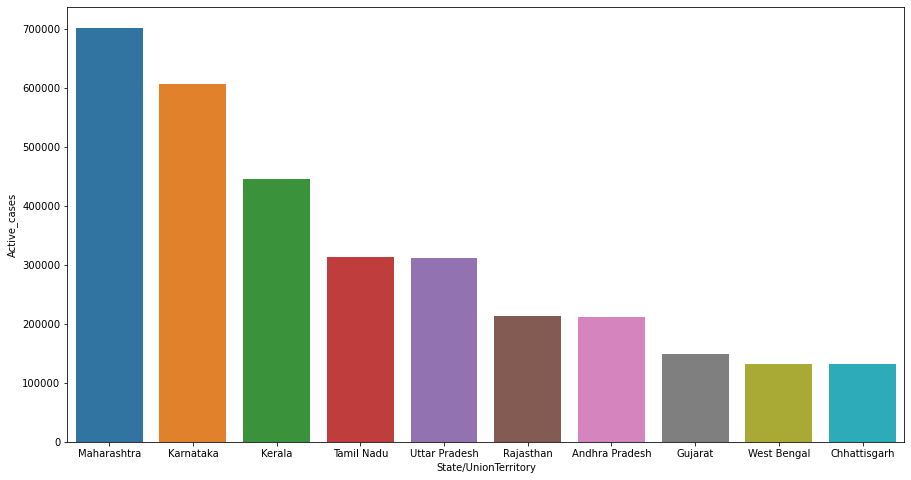

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10_active_states[:10], y="Active_cases", x="State/UnionTerritory")